In [1]:
import  lib_Experimentum    as      Exp
from    Alessandria         import  *
from    Models              import  S_2_Generate, S_Dynamical_Form_Factor_2, S_Dynamical_Form_Factor_0, S_0_Generate

import pandas as pd
import  numpy               as      np
from    scipy.io            import  loadmat

from    matplotlib.pyplot   import  plot
import  matplotlib.pyplot   as      plt


import  time

#I/O 
now_path        =   '../BRILLOUIN/TDP43/NO_ARS_13_02/'
spectra_filename    =   'NO_ARS_13_02'
VIPA_filename       =   'NO_ARS_13_02_VIPA_not_sat.tif'


log_file            =   'log_'+spectra_filename
analysis_dir       =   'analysis_best/'

#operatives
syg_kwargs          =   {'height': 20, 'distance': 20, 'width': 3.}
syg_kwargs_VIPA     =   {'distance':70, 'width': 1}
syg_kwargs_brill    =  {'height': 15.8, 'distance': 25, 'width': 3.}
VIPA_treshold       =   8
sat_height          =   50000
sat_width           =   13.5

#quanto mi allontano dal VIPA
pre_cut             =   False
cut                 =   False
cut_distance        =   0.25

cols_smart  =  ('Co', 'Omega', 'Gamma', 'delta_position',  'delta_amplitude', 'A', 'mu', 'sigma', 'shift', 'offset')
cols_basic  = ('Co', 'Omega', 'Gamma', 'delta_position', 'delta_width',  'delta_amplitude')
cols        = ('Co', 'Omega', 'Gamma', 'Delta', 'tau', 'delta_position',  'delta_width', 'delta_amplitude', 'A', 'mu', 'sigma', 'shift', 'offset')
cols_mark   = ('Co', 'Omega', 'Gamma', 'delta_position', 'delta_width',  'delta_amplitude', 'A', 'mu', 'sigma', 'shift', 'offset')
cols_real   = ('Co', 'Omega', 'Gamma', 'Delta', 'tau', 'delta_position', 'delta_width', 'delta_amplitude','shift', 'offset')
cols_gauss  = ( 'A', 'mu', 'sigma')

ATTENZIONE funzione da aggiornare



ATTENZIONE guarda Get_VIPA_mat


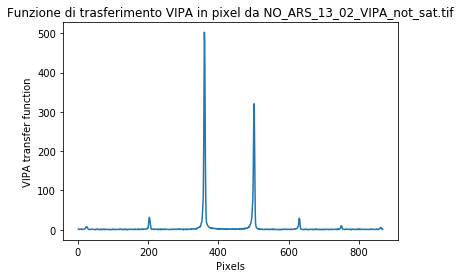

Text(0.5, 1.0, '(24, 4)')

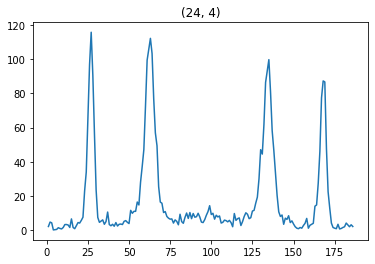

In [2]:
#0) importo dati e inizializzo oggetti
i   =   24
j   =   4
y    =   Import_from_Matlab(spectra_filename, now_path, var_name = 'y3')[i][j]
Data    =   Exp.Spectrum(name = str((i,j)))
Data.Get_Spectrum(y = np.resize(y, np.max(y.shape)), offset = 183., cut = pre_cut, cut_range = (10, 175))
Data.Get_Spectrum_Peaks(**syg_kwargs)
Data.Get_VIPA_tif(VIPA_filename, now_path, fig = 'VIPA_img', save_path = now_path)

plt.figure()
plt.plot(Data.x, Data.y)
plt.title(str((i,j)))

Spettro con Brillouin più alti
Lo spettro è bono
Lo spettro ha 4 picchi


Text(0.5, 1.0, '(24, 4)')

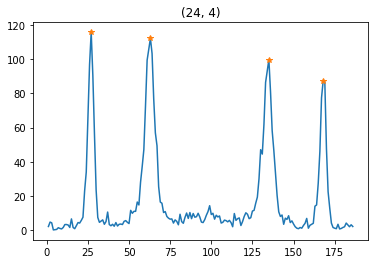

In [3]:
#1) Classificazione e visualizzazione spettro
check = Data.Check_Spectrum_Saturation(saturation_height = sat_height, saturation_width = sat_width)

if      check == 1  : nature    = 'saturo'
elif    (Data.n_peaks == 2) :

    Data.Get_Spectrum_Peaks(**syg_kwargs_brill)
    if (Data.y[Data.peaks['idx'][2]] > Data.y[Data.peaks['idx'][1]]) & (Data.y[Data.peaks['idx'][2]] > Data.y[Data.peaks['idx'][3]]):
        nature    = 'brillouin_highest_dx'
    elif (Data.y[Data.peaks['idx'][1]] > Data.y[Data.peaks['idx'][2]]) & (Data.y[Data.peaks['idx'][1]] > Data.y[Data.peaks['idx'][0]]):
        nature    = 'brillouin_highest_sx'
    else:
        raise ValueError ('Non ho riconosciuto lo spettro\n')

elif (Data.n_peaks == 3) :
    Data.Get_Spectrum_Peaks(**syg_kwargs_brill) 
    nature = 'brillouin_higher'
else:                 nature    = 'bono'
print('Lo spettro è '+nature)
print('Lo spettro ha {} picchi'.format(Data.n_peaks))
plt.figure()
plt.plot(Data.x, Data.y)
plt.plot(Data.x[Data.peaks['idx']], Data.y[Data.peaks['idx']], '*')
plt.title(str((i,j)))

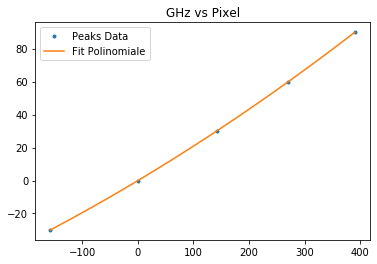

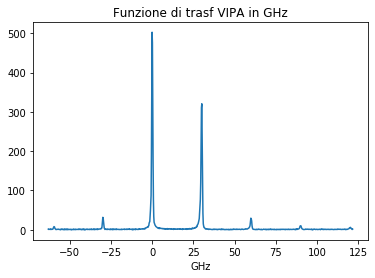

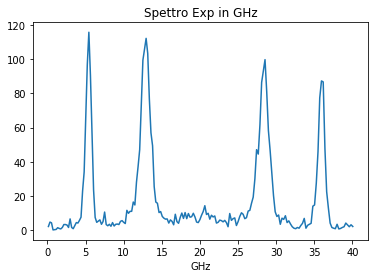

In [5]:
#2) Operazioni di conversione in GHz

Data.How_Many_Peaks_To_VIPA(treshold = VIPA_treshold, **syg_kwargs_VIPA)
Data.Fit_Pixel2GHz(fig = True)
Data.VIPA_Pix2GHz(fig = True)

if nature == 'brillouin_higher':
        Data.Get_Spectrum_Peaks(**syg_kwargs_brill)

Data.Spectrum_Pix2GHz(fig = True)




Ho stimato 11 parametri iniziali per il fit che andrai a fare

Co  = 1.000 

Omega  = 7.797 

Gamma  = 0.100 

delta_position  = 0.000 

delta_width  = 0.100 

delta_amplitude  = 0.010 

A  =  nan 

mu  =  nan 

sigma  =  nan 

shift  = 0.000 

offset  = 0.000 



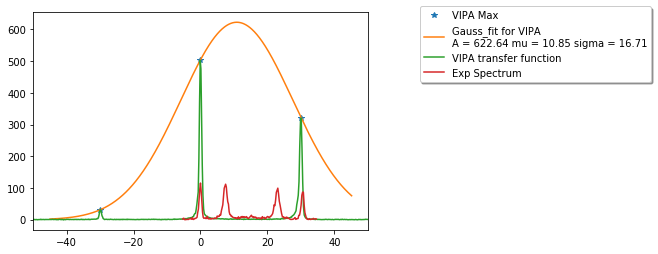

In [6]:
#3) Eseeguo taglio e stima parametri iniziali spettro, verifiche
Data.Align_Spectrum()
Data.Cut_n_Estimate_Spectrum(estimate = True, cut = cut, verbose = True, distanza = cut_distance)
Data.Fit_VIPA_Gaussian(fig = True)

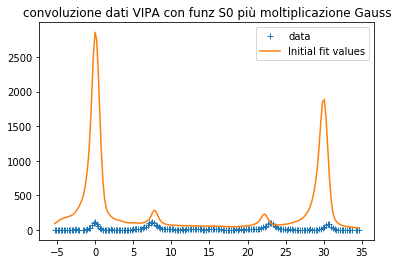

In [7]:
_ = Data.Gauss_Convolve_Markovian_Response_Smart(Data.p0[list(cols_smart)].values[0], fig = True)

In [7]:
Data.p0

,Co,Omega,Gamma,delta_position,delta_width,delta_amplitude,A,mu,sigma,shift,offset
Initials,1,7.665266,0.1,0.0,0.1,0.01,622.635499,10.851784,16.706945,0.0,0




 Ho trovato 4 picchi nel tuo spettro sperimentale con le caratteristiche richieste
 Altezza > 88.00 
 Spessore > 1.00 



 Il picco 1 ha: 	 indice = 21 	 x_value (pix) = 23.00 	 ampiezza(pix) = 4.01 	 altezza = 932.29 


 Il picco 2 ha: 	 indice = 57 	 x_value (pix) = 59.00 	 ampiezza(pix) = 6.16 	 altezza = 120.71 


 Il picco 3 ha: 	 indice = 128 	 x_value (pix) = 130.00 	 ampiezza(pix) = 6.39 	 altezza = 111.00 


 Il picco 4 ha: 	 indice = 163 	 x_value (pix) = 165.00 	 ampiezza(pix) = 4.10 	 altezza = 905.57 



{'n_peaks': 4,
 'idx': array([ 21,  57, 128, 163]),
 'peaks_width': array([4.00683243, 6.16222264, 6.39286737, 4.10202909]),
 'peak_heights': array([932.28571429, 120.71428571, 111.        , 905.57142857])}

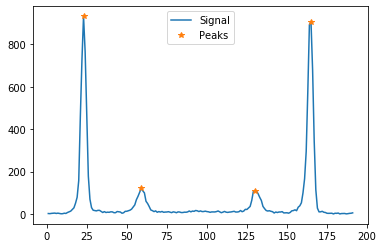

In [8]:
 Analyze_Peaks(Data.x, Data.y, 'pix', height = 88, distance = 35, width = 1., verbose = True, fig = True)
#plot(Data.peaks

In [8]:
#3) fit markoviano
percents        =   ('positive', 0.2, 'positive', np.inf, 'positive', 0.5, 0.5, 0.5,  np.inf, np.inf)
Data.Get_p0(Data.p0.values[0], cols_smart)
print(Data.p0)
Data.Get_cost_markov(Data.p0[list(cols_smart)].values[0])
print('Cost before fitting = {}'.format(Data.cost_markov))
Data.Get_Fit_Bounds(percents, cols_smart)
_= Data.Non_Linear_Least_Squares_Markov(cols_smart, bound = (Data.bounds['down'].values, Data.bounds['up'].values), verbose = 2, max_nfev = 500)
#_ = Data.Non_Linear_Least_Squares_Markov(bound = (Data.bounds['down'].values, Data.bounds['up'].values),  max_nfev = 500)
#Data.Get_cost_markov(Data.Markov_Fit_Params.values[0])
#print('Cost after fitting = {}\n'.format(Data.cost_markov))
print(Data.Markov_Fit_Params)
Data.Take_A_Look_Before_Fitting()

Co     Omega  Gamma  delta_position  delta_amplitude     A  \
Values  1.0  7.797191    0.1             0.0              0.1  0.01   

                mu      sigma      shift  offset  
Values  622.635499  10.851784  16.706945     0.0  
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan]
Cost before fitt

ValueError: Residuals are not finite in the initial point.

In [14]:
Data.p0[list(cols_smart)].values[0]

array([1.00000000e+00, 7.66526576e+00, 1.00000000e-01, 0.00000000e+00,
       1.00000000e-01, 1.00000000e-02, 6.22635499e+02, 1.08517836e+01,
       1.67069448e+01, 0.00000000e+00])

In [ ]:
plt.figure()
plt.title(str((i,j))+' cost = {}'.format(Data.cost_markov))
plt.plot(Data.x_freq, Data.y, label = 'data')
plt.plot(Data.x_freq, Data.y_markov_fit, label = 'fit')
plt.xlim(3, 27)
plt.ylim(-5, 200)
plt.legend()


In [ ]:
#4) fit totale
percents                    =   (0.2, 0.1, 0.1, 'positive', 'positive', 0.15, 0.15, 0.15, np.inf, np.inf)
Data.Initials_Parameters_from_Markov(Data.Markov_Fit_Params.T['Values'].values)
Data.Get_Fit_Bounds(percents, columns = cols_real)
p_gauss = Data.Markov_Fit_Params[list(cols_gauss)].values[0]
Data.Get_p0(Data.p0[list(cols_real)].values[0], cols_real)
Data.Non_Linear_Least_Squares(p_gauss, cols_real, bound = (Data.bounds['down'].values, Data.bounds['up'].values), verbose = 2, fig = True, max_nfev = 50)


In [ ]:
Data.Tot_Fit_Params

In [ ]:
Data.Markov_Fit_Params

In [ ]:
Analyze_Peaks(Data.x, Data.y, 'pix', **syg_kwargs, fig = True, verbose = True)